In [76]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [77]:
df = pd.read_csv("SBER Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/26/2023,256.02,252.13,257.17,250.90,34.71M,1.33%
1,09/25/2023,252.65,252.00,253.49,249.83,31.86M,0.26%
2,09/22/2023,251.99,249.85,253.10,248.62,40.71M,0.73%
3,09/21/2023,250.16,252.87,254.20,249.81,58.91M,-1.42%
4,09/20/2023,253.77,252.80,255.47,249.82,66.83M,0.42%


In [78]:
df.shape

(3424, 7)

In [79]:
df.isnull().values.any()

False

In [80]:
df = df.rename(columns={"Change %" : "Change", "Vol." : "Vol"})

In [81]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Vol        object
Change     object
dtype: object

In [82]:
def vol_converter(x):
    if 'M' in x:
        return (float(x.strip('M'))*1000000)
    elif 'B' in x:
        return (float(x.strip('B'))*1000000000)
    

df["Vol"] = df["Vol"].map(vol_converter)
df["Change"] = df["Change"].map(lambda x: float(x.strip('%'))*0.01)


In [83]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Vol       float64
Change    float64
dtype: object

In [84]:
df.describe()

,Price,Open,High,Low,Vol,Change
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000
mean,155.194582,155.207693,157.092956,153.150926,1.005128e+08,0.000571
std,75.041959,75.067396,75.779321,74.219382,8.229731e+07,0.022072
min,53.500000,53.040000,55.450000,47.210000,6.510000e+06,-0.366100
25%,92.030000,92.200000,92.927500,91.120000,4.709000e+07,-0.009825
50%,131.475000,131.565000,133.495000,128.770000,7.557500e+07,0.000300
75%,219.012500,218.627500,222.135000,216.440000,1.265050e+08,0.011700
max,387.600000,385.880000,388.110000,376.720000,1.080000e+09,0.129000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3424 non-null   object 
 1   Price   3424 non-null   float64
 2   Open    3424 non-null   float64
 3   High    3424 non-null   float64
 4   Low     3424 non-null   float64
 5   Vol     3424 non-null   float64
 6   Change  3424 non-null   float64
dtypes: float64(6), object(1)
memory usage: 187.4+ KB


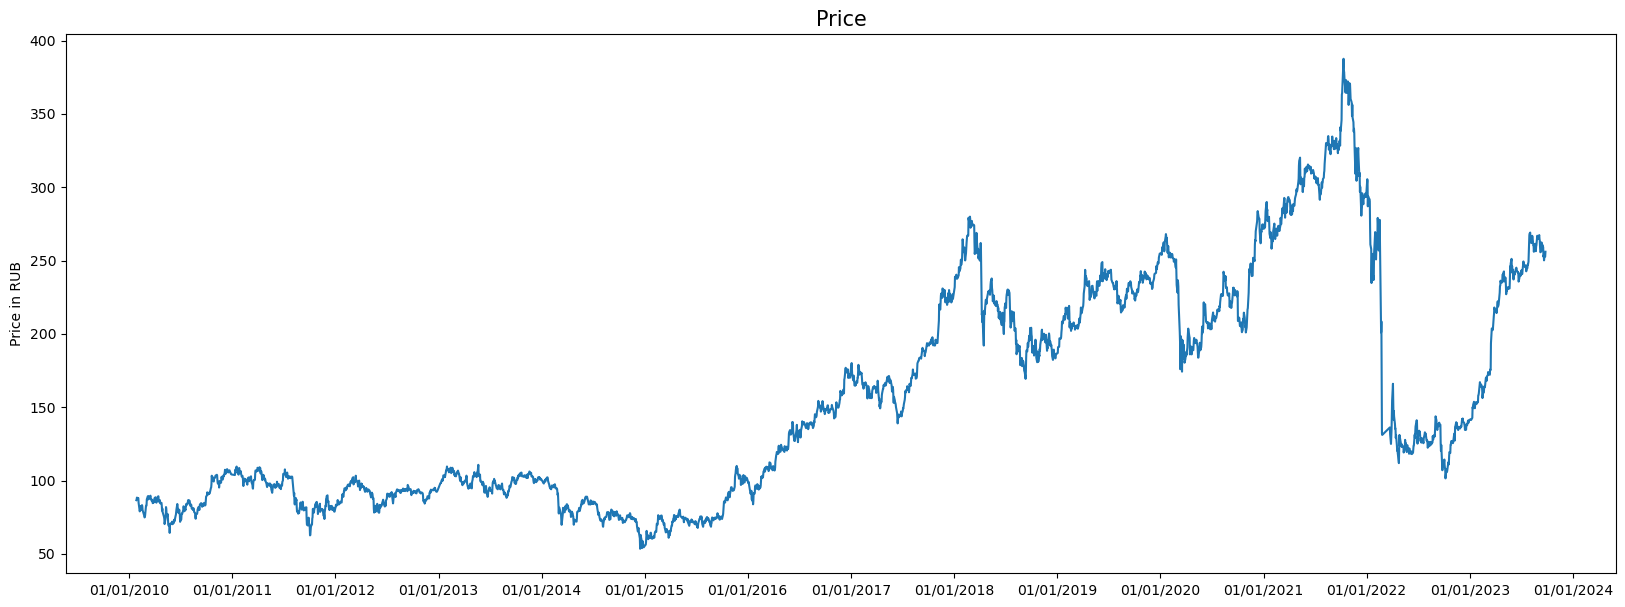

In [86]:
import datetime as dt
import matplotlib.dates as mdates

dates = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in df["Date"]]

plt.figure(figsize=(20,7))
plt.plot(dates, df["Price"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('Price', fontsize=15)
plt.ylabel('Price in RUB')
plt.show()

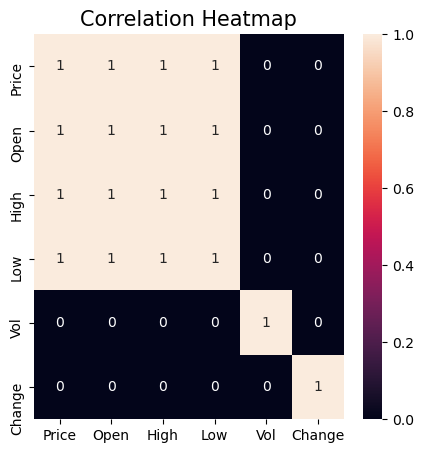

,Price,Open,High,Low,Vol,Change
Price,1.000000,0.999033,0.999416,0.999525,-0.449690,0.020572
Open,0.999033,1.000000,0.999607,0.999188,-0.446200,-0.015689
High,0.999416,0.999607,1.000000,0.998922,-0.438327,-0.001714
Low,0.999525,0.999188,0.998922,1.000000,-0.460722,0.009142
Vol,-0.449690,-0.446200,-0.438327,-0.460722,1.000000,-0.052675
Change,0.020572,-0.015689,-0.001714,0.009142,-0.052675,1.000000


In [87]:
plt.figure(figsize=(5,5))

sb.heatmap(df.corr()> 0.9, annot=True)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

df.corr()


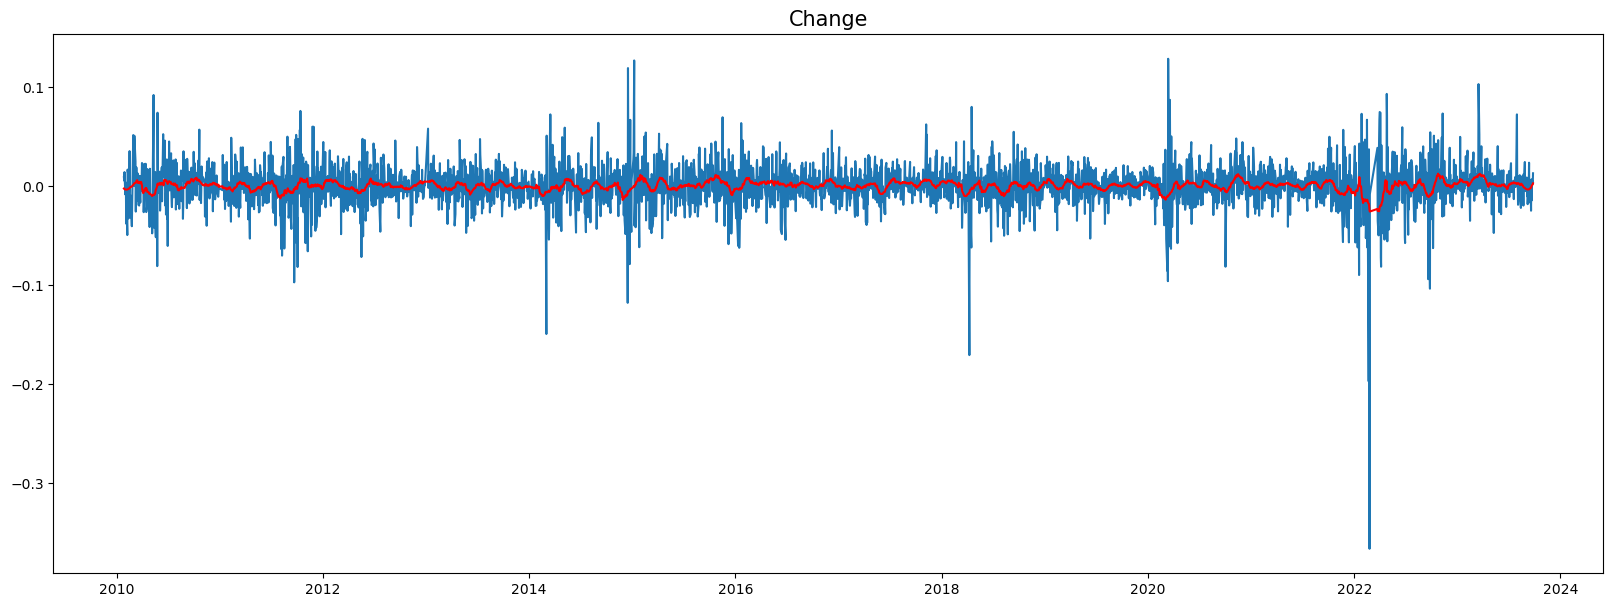

In [88]:
from scipy.signal import savgol_filter

plt.figure(figsize=(20,7))
plt.plot(dates, df["Change"])

change_smoothed = savgol_filter(df["Change"], 51, 3)
plt.plot(dates, change_smoothed, color='red')

plt.title('Change', fontsize=15)
plt.show()

In [89]:
df_by_change = df.sort_values(by=['Change'])

df_by_change.head(20)

,Date,Price,Open,High,Low,Vol,Change
383,02/24/2022,132.18,187.54,187.54,89.59,8.293600e+08,-0.3661
385,02/21/2022,201.00,249.15,258.32,184.30,1.080000e+09,-0.1969
1365,04/09/2018,213.00,255.05,255.30,205.00,2.500200e+08,-0.1704
2395,03/03/2014,77.57,85.50,86.84,74.96,4.279100e+08,-0.1491
2195,12/16/2014,53.50,59.50,61.95,47.21,4.707500e+08,-0.1176
254,09/26/2022,107.06,114.00,117.99,105.00,1.486400e+08,-0.1033
3010,09/22/2011,73.80,79.82,79.90,73.76,3.830800e+08,-0.0969
878,03/12/2020,175.91,185.15,187.87,173.14,1.979700e+08,-0.0957
258,09/20/2022,125.10,137.87,138.35,122.42,2.089500e+08,-0.0937
409,01/18/2022,234.70,258.80,259.39,228.09,4.840600e+08,-0.0895


In [90]:
df_by_change.tail(20)

,Date,Price,Open,High,Low,Vol,Change
389,02/15/2022,274.00,257.89,274.00,257.51,271520000.0,0.0674
376,03/31/2022,143.69,135.25,147.41,134.52,118430000.0,0.0675
1966,11/17/2015,102.50,96.52,102.67,96.52,181100000.0,0.0699
357,04/27/2022,131.11,123.00,131.73,120.60,115500000.0,0.0715
2386,03/17/2014,76.97,72.50,77.12,71.87,344320000.0,0.0728
41,07/31/2023,267.40,251.33,267.77,251.33,167910000.0,0.0728
402,01/27/2022,254.29,235.00,260.00,233.10,301310000.0,0.0734
222,11/10/2022,136.68,131.00,136.69,129.77,171750000.0,0.0737
374,04/04/2022,166.00,158.76,166.88,150.20,115940000.0,0.0744
3342,05/26/2010,69.12,66.19,69.39,65.60,517830000.0,0.0745


In [91]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

print(pd.date_range(start = '2010-01-27', end = '2023-09-26' ).difference(df.index))

df.loc[df.index.strftime('%Y-%m-%d') == '2010-02-06']

DatetimeIndex(['2010-01-30', '2010-01-31', '2010-02-06', '2010-02-07',
               '2010-02-13', '2010-02-14', '2010-02-20', '2010-02-21',
               '2010-02-22', '2010-02-23',
               ...
               '2023-08-26', '2023-08-27', '2023-09-02', '2023-09-03',
               '2023-09-09', '2023-09-10', '2023-09-16', '2023-09-17',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', length=1567, freq=None)


,Price,Open,High,Low,Vol,Change
Date,,,,,,


In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(df.head())

price_seasonal_analysis = seasonal_decompose(df["Price"], model="additive")
volume_seasonal_analysis = seasonal_decompose(df["Vol"], model="additive")
change_seasonal_analysis = seasonal_decompose(df["Change"], model="additive")

price_trend = price_seasonal_analysis.trend
seasonal = price_seasonal_analysis.seasonal
residual = price_seasonal_analysis.resid


price_seasonal_analysis.plot()



             Price    Open    High     Low         Vol  Change
Date                                                          
2023-09-26  256.02  252.13  257.17  250.90  34710000.0  0.0133
2023-09-25  252.65  252.00  253.49  249.83  31860000.0  0.0026
2023-09-22  251.99  249.85  253.10  248.62  40710000.0  0.0073
2023-09-21  250.16  252.87  254.20  249.81  58910000.0 -0.0142
2023-09-20  253.77  252.80  255.47  249.82  66830000.0  0.0042


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None